# Netflix Movies and TV shows

### 1. Importing libraries and data
### 2. Data wrangling
### 3. Data prep for regression analysis
#### 3.1 Testing the first hypothesis 
##### 3.1.1 Regression analysis
##### 3.1.2 Performance improvement after removing outliers
#### 3.2 Testing the second hypothesis 
##### 3.2.1 Regression analysis
##### 3.2.2 Performance improvement after removing outliers


# 1. Importing Libraries and Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
# Defining a path
path = r'C:\Users\franc\Documents\Netflix Movies and tv shows'

In [4]:
# Importing the dataset
df_final = pd.read_pickle(os.path.join(path, 'Data','Prepared Data', 'final.pkl'))

# 2. Data wrangling

##### Performing Data Quality checks

In [5]:
# Getting info about the data sets
df_final.columns

Index(['id', 'title', 'type', 'release_year', 'lenght', 'genres',
       'production_countries', 'seasons', 'imdb_score', 'imdb_votes',
       'tmdb_popularity', 'tmdb_score', 'genre', 'country', 'imdb_score_level',
       'tmdb_score_level'],
      dtype='object')

In [6]:
df_final.head(10)

,id,title,type,release_year,lenght,genres,production_countries,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,genre,country,imdb_score_level,tmdb_score_level
0,ts300399,Five Came Back: The Reference Films,show,1945,51,documentation,US,1,6.536443,0,0.600000,6.629937,documentation,US,NaN,NaN
1,tm82169,Rocky,movie,1976,119,"drama, sport",US,0,8.100000,588100,106.400002,7.800000,drama,US,NaN,High score
2,tm17823,Grease,movie,1978,110,"romance, comedy",US,0,7.200000,283316,33.200001,7.400000,romance,US,High score,High score
3,tm191099,The Sting,movie,1973,129,"crime, drama, comedy, music",US,0,8.300000,266738,24.600000,8.000000,crime,US,NaN,High score
4,tm69975,Rocky II,movie,1979,119,"drama, sport",US,0,7.300000,216307,75.699997,7.200000,drama,US,High score,High score
5,tm127384,Monty Python and the Holy Grail,movie,1975,91,"fantasy, comedy",GB,0,8.200000,547292,21.000000,7.800000,fantasy,GB,NaN,High score
6,tm17249,Animal House,movie,1978,109,comedy,US,0,7.400000,123611,17.400000,7.000000,comedy,US,High score,High score
7,ts22164,Monty Python's Flying Circus,show,1969,30,"comedy, european",GB,4,8.800000,75654,24.799999,8.300000,comedy,GB,NaN,NaN
8,tm70993,Life of Brian,movie,1979,94,comedy,GB,0,8.000000,405022,19.799999,7.800000,comedy,GB,High score,High score
9,tm16479,White Christmas,movie,1954,120,"comedy, music, romance",US,0,7.500000,46586,11.600000,7.200000,comedy,US,High score,High score


In [7]:
df_final.shape

(6105, 16)

##### Removing duplicates

In [8]:
dups = df_final.duplicated()

In [9]:
dups.shape # No duplicates have been found

(6105,)

##### Checking for missing values

In [10]:
df_final.isnull().sum()

id                        0
title                     0
type                      0
release_year              0
lenght                    0
genres                    0
production_countries      0
seasons                   0
imdb_score                0
imdb_votes                0
tmdb_popularity           0
tmdb_score                0
genre                     0
country                   0
imdb_score_level        862
tmdb_score_level        701
dtype: int64

In [11]:
# Imputing missing values with median

df_final['tmdb_popularity'].fillna(df_final['tmdb_popularity'].mean(), inplace=True)
df_final['tmdb_score'].fillna(df_final['tmdb_score'].mean(), inplace=True)
df_final['imdb_score'].fillna(df_final['imdb_score'].mean(), inplace=True)

In [12]:
# Another check for NaN
df_final.isnull().sum()

id                        0
title                     0
type                      0
release_year              0
lenght                    0
genres                    0
production_countries      0
seasons                   0
imdb_score                0
imdb_votes                0
tmdb_popularity           0
tmdb_score                0
genre                     0
country                   0
imdb_score_level        862
tmdb_score_level        701
dtype: int64

##### Checking for extreme values

C:\Users\franc\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='imdb_score', ylabel='Density'>

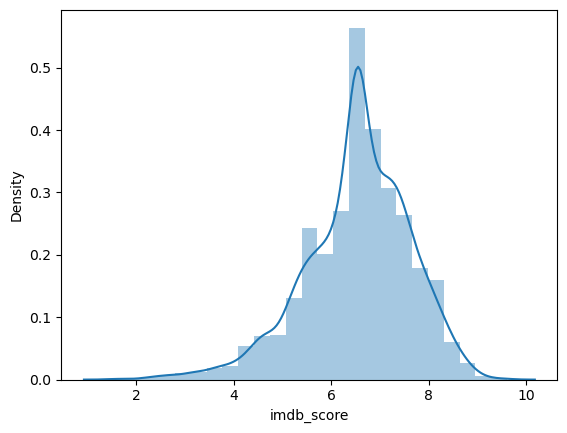

In [13]:
sns.distplot(df_final['imdb_score'],bins = 25, kde = True)  # Showing extreme values for imdb_score

C:\Users\franc\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='tmdb_score', ylabel='Density'>

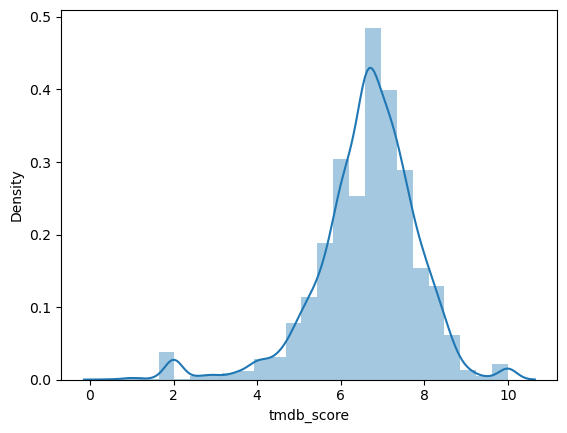

In [14]:
sns.distplot(df_final['tmdb_score'],bins = 25, kde = True) # Showing extreme values for tmdb_score

C:\Users\franc\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='tmdb_popularity', ylabel='Density'>

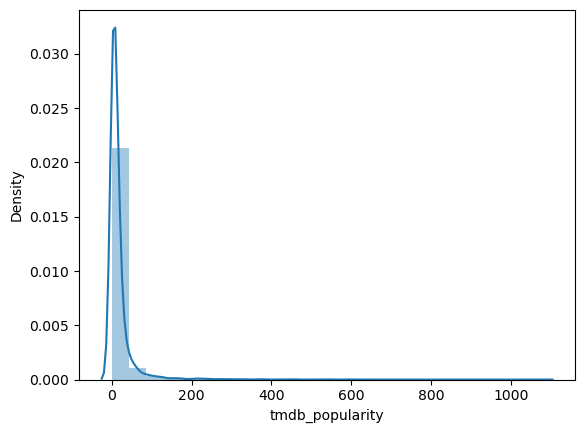

In [15]:
sns.distplot(df_final['tmdb_popularity'],bins = 25, kde = True) # Showing extreme values for tmdb_popularity

C:\Users\franc\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='imdb_votes', ylabel='Density'>

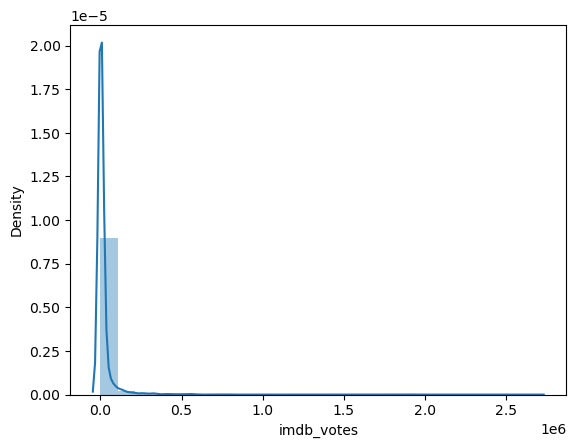

In [16]:
sns.distplot(df_final['imdb_votes'],bins = 25, kde = True) # Showing extreme values for imdb_votes

In [17]:
df_final.describe()

,release_year,lenght,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
count,6105.000000,6105.000000,6105.000000,6105.000000,6.105000e+03,6105.000000,6105.000000
mean,2017.446847,76.595741,0.694513,6.536451,1.914609e+04,18.541834,6.629939
std,6.511596,39.060783,1.282843,1.089273,8.797632e+04,47.067753,1.226334
min,1945.000000,0.000000,0.000000,1.500000,0.000000e+00,0.000000,0.500000
25%,2017.000000,44.000000,0.000000,5.900000,3.060000e+02,3.400000,6.000000
50%,2019.000000,80.000000,0.000000,6.536443,1.651000e+03,7.700000,6.700000
75%,2021.000000,105.000000,1.000000,7.300000,7.638000e+03,16.799999,7.400000
max,2023.000000,225.000000,10.000000,9.600000,2.684317e+06,1078.599976,10.000000


# 3. Data prep for regression analysis

##### H1: The most well-liked titles have also the greatest number of reviews

### 3.1 Testing the first hypothesis 

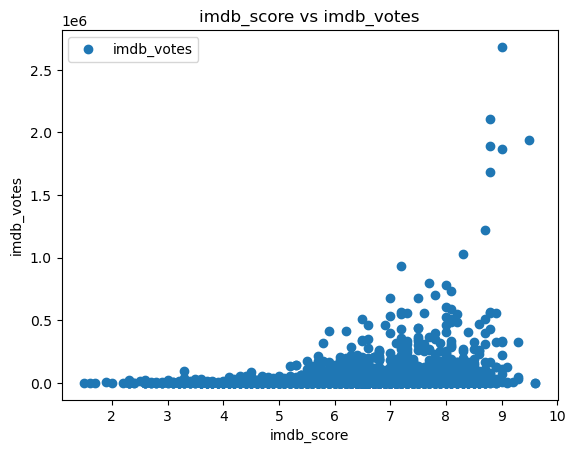

In [18]:
# Scatterplot to investigate how imdb_score and imdb_votes variables influence each other.

df_final.plot(x = 'imdb_score', y='imdb_votes',style='o')
plt.title('imdb_score vs imdb_votes')
plt.xlabel('imdb_score')
plt.ylabel('imdb_votes')
plt.show()

In [19]:
# Reshaping the variables into NumPy arrays and put them into separate objects.

x = df_final['imdb_score'].values.reshape(-1,1)
y = df_final['imdb_votes'].values.reshape(-1,1)

In [20]:
x

array([[6.5364428],
       [8.1      ],
       [7.2      ],
       ...,
       [6.1      ],
       [5.2      ],
       [7.       ]], dtype=float32)

In [21]:
y

array([[     0],
       [588100],
       [283316],
       ...,
       [    91],
       [    18],
       [    40]])

In [22]:
# Splitting data into a training set and a test set.

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

### 3.1.2 Regression Analysis

In [23]:
# Creating a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [24]:
# Fitting the regression object onto the training set.

regression.fit(x_train, y_train)

LinearRegression()

In [25]:
# Predicting the values of y using X.

y_predicted = regression.predict(x_test)

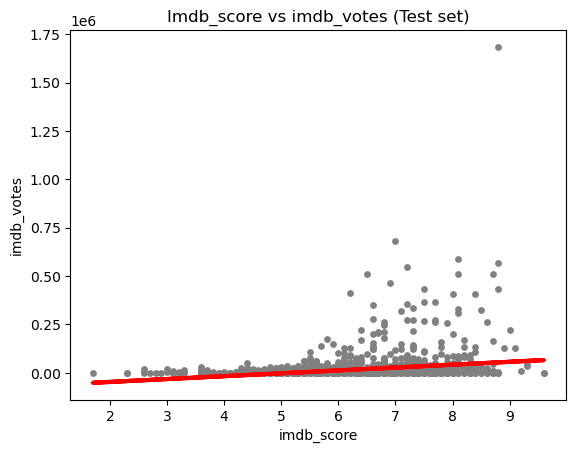

In [26]:
# Creating a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(x_test, y_test, color='gray', s = 15)
plot_test.plot(x_test, y_predicted, color='red', linewidth =3)
plot_test.title('Imdb_score vs imdb_votes (Test set)')
plot_test.xlabel('imdb_score')
plot_test.ylabel('imdb_votes')
plot_test.show()

### 3.1.3 Performance improvement after removing outliers

In [27]:
# Cleaning the extreme values from the "Price per Unit" variable observed during the consistency checks.

df_test = df_final[df_final['imdb_votes'] <=500000] 

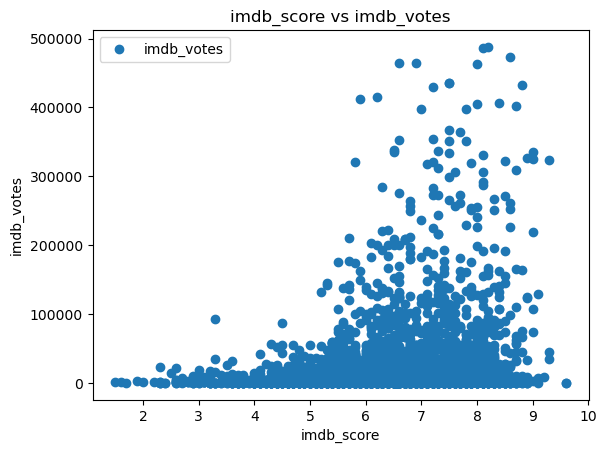

In [28]:
# Creating a scatterplot  without outliers.

df_test.plot(x = 'imdb_score', y='imdb_votes', style='o')  
plt.title('imdb_score vs imdb_votes')
plt.xlabel('imdb_score')
plt.ylabel('imdb_votes')
plt.show()

In [29]:
# Reshaping again.

x_2 = df_final['imdb_score'].values.reshape(-1,1)
y_2 = df_final['imdb_votes'].values.reshape(-1,1)

In [30]:
x_train_2, x_test_2, y_train_2, y_test_2 = train_test_split(x_2, y_2, test_size=0.3, random_state=0)

In [31]:
# Running and fitting the regression.

regression = LinearRegression()  
regression.fit(x_train_2, y_train_2)

LinearRegression()

In [32]:
# Predicting

y_predicted_2 = regression.predict(x_test_2)

In [33]:
rmse = mean_squared_error(y_test_2, y_predicted_2)
r2 = r2_score(y_test_2, y_predicted_2)

In [34]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[14859.698]]
Mean squared error:  4642662876.130043
R2 score:  0.026201877323060008


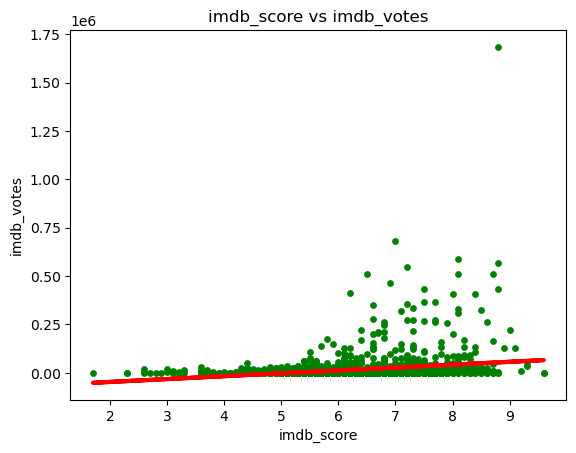

In [35]:
# Visualizing the test set results.
plot_test = plt
plot_test.scatter(x_test_2, y_test_2, color='green', s = 15)
plot_test.plot(x_test_2, y_predicted_2, color='red', linewidth =3)
plot_test.title('imdb_score vs imdb_votes')
plot_test.xlabel('imdb_score')
plot_test.ylabel('imdb_votes')
plot_test.show()

In [36]:
data = pd.DataFrame({'Actual': y_test_2.flatten(), 'Predicted': y_predicted_2.flatten()})
data.head(30)

,Actual,Predicted
0,8145,23599.531250
1,28030,29543.406250
2,54,-28409.417969
3,9051,4281.921875
4,95,16169.679688
5,4702,35487.281250
6,621,26571.468750
7,1312,34001.312500
8,147,53318.921875
9,3838,4281.921875


This model is not a good fit since the MSE is quite huge (7231270305.5588665) and the R2 score is nearly zero. However, the positive slope suggests a positive link between the two variables (as X rises, so does y).

#### H2: The highest-rated titles are also the most popular ones

### 3.2 Testing the second hypothesis 

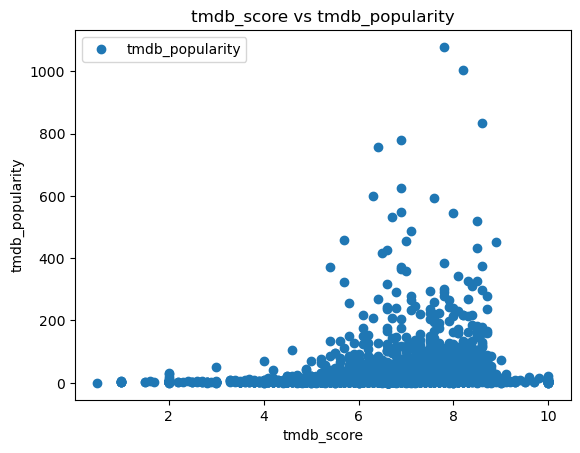

In [37]:
# Creating a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df_final.plot(x = 'tmdb_score', y='tmdb_popularity',style='o')
plt.title('tmdb_score vs tmdb_popularity')
plt.xlabel('tmdb_score')
plt.ylabel('tmdb_popularity')
plt.show()

In [38]:
# Reshaping the variables into NumPy arrays and put them into separate objects.

x = df_final['tmdb_score'].values.reshape(-1,1)
y = df_final['tmdb_popularity'].values.reshape(-1,1)

In [39]:
x

array([[6.629937],
       [7.8     ],
       [7.4     ],
       ...,
       [6.629937],
       [4.      ],
       [6.629937]], dtype=float32)

In [40]:
y

array([[  0.6     ],
       [106.4     ],
       [ 33.2     ],
       ...,
       [  2.      ],
       [  1.4     ],
       [ 18.541842]], dtype=float32)

In [41]:
# Splitting data into a training set and a test set.

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

### 3.2.2 Regression Analysis

In [42]:
# Creating a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [43]:
# Fitting the regression object onto the training set.

regression.fit(x_train, y_train)

LinearRegression()

In [44]:
# Predicting the values of y using X.

y_predicted = regression.predict(x_test)

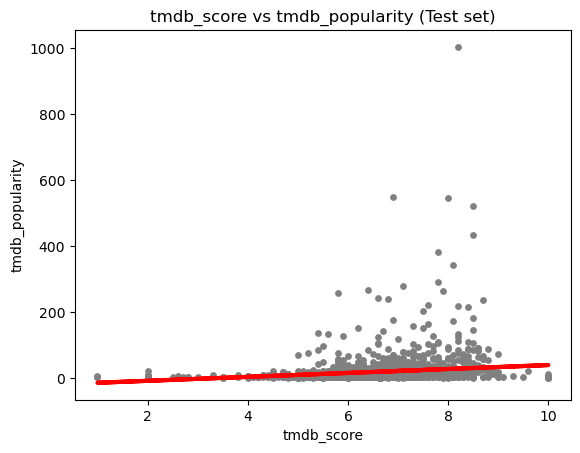

In [45]:
# Creating a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(x_test, y_test, color='gray', s = 15)
plot_test.plot(x_test, y_predicted, color='red', linewidth =3)
plot_test.title('tmdb_score vs tmdb_popularity (Test set)')
plot_test.xlabel('tmdb_score')
plot_test.ylabel('tmdb_popularity')
plot_test.show()

### 3.2.3 Performance improvement after removing outliers

In [46]:
# Cleaning the extreme values from the "Price per Unit" variable observed during the consistency checks.

df_test = df_final[df_final['tmdb_popularity'] <=200] 

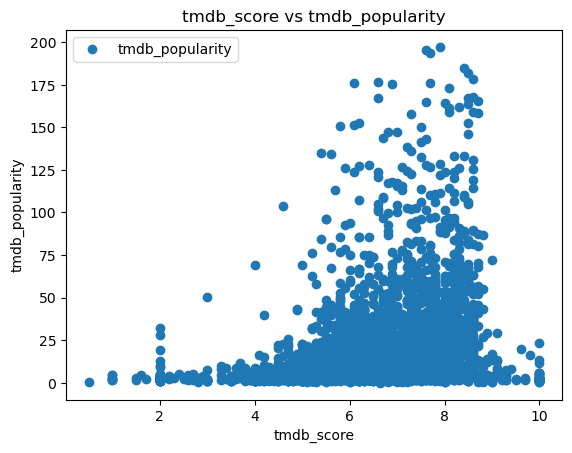

In [47]:
# Creating a scatterplot  without outliers.

df_test.plot(x = 'tmdb_score', y='tmdb_popularity', style='o')  
plt.title('tmdb_score vs tmdb_popularity')
plt.xlabel('tmdb_score')
plt.ylabel('tmdb_popularity')
plt.show()

In [48]:
# Reshaping again.

x_2 = df_final['tmdb_score'].values.reshape(-1,1)
y_2 = df_final['tmdb_popularity'].values.reshape(-1,1)

In [49]:
x_train_2, x_test_2, y_train_2, y_test_2 = train_test_split(x_2, y_2, test_size=0.3, random_state=0)

In [50]:
# Running and fitting the regression.

regression = LinearRegression()  
regression.fit(x_train_2, y_train_2)

LinearRegression()

In [51]:
# Predicting

y_predicted_2 = regression.predict(x_test_2)

In [52]:
rmse = mean_squared_error(y_test_2, y_predicted_2)
r2 = r2_score(y_test_2, y_predicted_2)

In [53]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[5.978813]]
Mean squared error:  1932.6296
R2 score:  0.033601961811374315


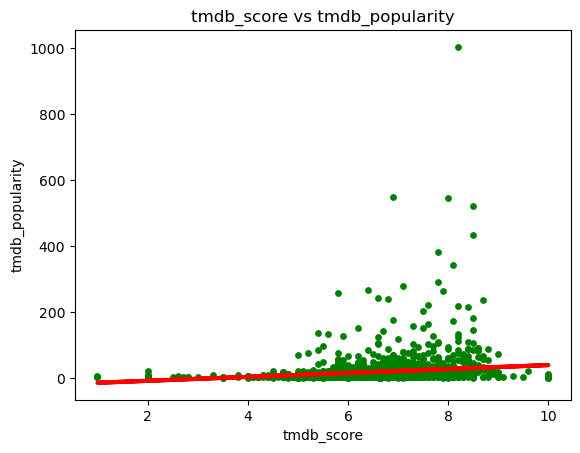

In [54]:
# Visualizing the test set results.
plot_test = plt
plot_test.scatter(x_test_2, y_test_2, color='green', s = 15)
plot_test.plot(x_test_2, y_predicted_2, color='red', linewidth =3)
plot_test.title('tmdb_score vs tmdb_popularity')
plot_test.xlabel('tmdb_score')
plot_test.ylabel('tmdb_popularity')
plot_test.show()

In [55]:
data = pd.DataFrame({'Actual': y_test_2.flatten(), 'Predicted': y_predicted_2.flatten()})
data.head(30)

,Actual,Predicted
0,12.300000,19.760157
1,45.000000,23.347445
2,6.500000,10.194054
3,13.900000,10.194054
4,3.100000,19.760157
5,8.100000,23.347445
6,2.100000,20.955919
7,16.200001,23.347445
8,7.300000,22.151682
9,8.800000,12.585581


This visualization, like the previous one, shows a positive relationship between the two variables. Even in this example, however, this model is not a good match because the MSE is rather large (3859.58) and the R2 score is close to zero. In both scenarios, I had to impute the missing values with the mean, which may have influenced the outcome

In [56]:
# Exporting data to csv
df_final.to_csv(os.path.join(path, 'Data','Prepared Data', 'final.csv'))

In [57]:
# Exporting data to pkl
df_final.to_pickle(os.path.join(path, 'Data','Prepared Data', 'final.pkl'))